In [94]:
import tensorflow as tf
import numpy as np
import matplotlib

In [95]:
tf.__version__, np.__version__, matplotlib.__version__

('2.16.1', '1.26.4', '3.10.0')

In [96]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Reshape
from tensorflow.keras.regularizers import L1L2
import matplotlib.pyplot as plt

In [97]:
(X_treinamento, _), (_, _) = mnist.load_data()

In [98]:
X_treinamento = X_treinamento.astype('float32') / 255

In [99]:
X_treinamento[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [100]:
X_treinamento = tf.data.Dataset.from_tensor_slices(X_treinamento).shuffle(buffer_size=60000).batch(batch_size=256)

In [101]:
type(X_treinamento)

tensorflow.python.data.ops.batch_op._BatchDataset

In [102]:
#Imagens 28x28 = 784

In [103]:
#Gerador(recebe como entrada números aleatórios e irá criar imagens)
gerador = Sequential()
gerador.add(Dense(units=500, input_dim=100, activation = 'relu', kernel_regularizer=L1L2(1e-5,1e-5)))
#Temos 100 neurônios na camada de entrada que estão conectados com 500 neurônios da camada oculta
gerador.add(Dense(units=500, input_dim=100, activation = 'relu', kernel_regularizer=L1L2(1e-5,1e-5)))
gerador.add(Dense(units=784, activation='relu',kernel_regularizer=L1L2(1e-5,1e-5)))
#Aplicar o Reshape para transformar o formato de vetor para a imagem que é uma matriz
gerador.add(Reshape((28,28)))
gerador.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 500)            │        50,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 784)            │       392,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,784 (2.65 MB)

 Trainable params: 693,784 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
discriminador = Sequential()
discriminador.add(InputLayer(input_shape=(28,28)))
#Transformar os dados da imagem de matriz em vetor
discriminador.add(Flatten())
discriminador.add(Dense(units=500, activation='relu',kernel_regularizer=L1L2(1e-5,1e-5)))
discriminador.add(Dense(units=500, activation='relu',kernel_regularizer=L1L2(1e-5,1e-5)))
discriminador.add(Dense(units=1, activation='sigmoid',kernel_regularizer=L1L2(1e-5,1e-5)))
discriminador.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,501 (2.45 MB)

 Trainable params: 643,501 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
#Criar as funções que irão calcular o erro
#Saida esperada = 1
cross_entropy = tf.keras.losses.BinaryCrossentropy()

In [106]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

In [107]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [108]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [109]:
epochs = 100
noise_dim = 100

In [110]:
gerador(tf.random.normal([256,noise_dim]))

<tf.Tensor: shape=(256, 28, 28), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.18851453,
         0.06316143, 0.2488156 ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.16447884, 0.0700423 , ..., 0.        ,
         0.13500446, 0.2004275 ],
        ...,
        [0.24377039, 0.        , 0.        , ..., 0.        ,
         0.14953485, 0.36812887],
        [0.        , 0.        , 0.03424255, ..., 0.01370085,
         0.        , 0.08761965],
        [0.21681178, 0.2653721 , 0.        , ..., 0.        ,
         0.08156039, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.21835002,
         0.26474282, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.06922427, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.10732698,
         0.43802643, 0.28352585],
        ...,
        [0.2573301 , 0.        , 0.19964874, ..., 0. 

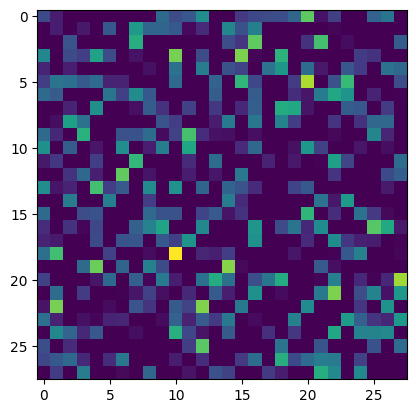

In [111]:
plt.imshow(gerador(tf.random.normal([256,noise_dim]))[0])

In [112]:
def train_step(images):
    noise = tf.random.normal([256, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = gerador(noise, training = True)

        real_output = discriminador(images, training = True)
        fake_output = discriminador(generated_images, training = True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, gerador.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss,discriminador.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator,gerador.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminador.trainable_variables))

        return gen_loss,disc_loss

In [113]:
for epoch in range(epochs):
    for image_batch in X_treinamento:
        gen_loss_batch, disc_loss_batch = train_step(image_batch)
        print(f'Época {epoch} | gen_loss: {gen_loss_batch} disc_loss {disc_loss_batch}')

Época 0 | gen_loss: 0.6844052076339722 disc_loss 1.4446899890899658
Época 0 | gen_loss: 0.6643776297569275 disc_loss 1.3993756771087646
Época 0 | gen_loss: 0.6368082761764526 disc_loss 1.3697376251220703
Época 0 | gen_loss: 0.6196831464767456 disc_loss 1.3320900201797485
Época 0 | gen_loss: 0.603574275970459 disc_loss 1.3026833534240723
Época 0 | gen_loss: 0.5912234783172607 disc_loss 1.2680721282958984
Época 0 | gen_loss: 0.5774390697479248 disc_loss 1.2643868923187256
Época 0 | gen_loss: 0.564491331577301 disc_loss 1.242414951324463
Época 0 | gen_loss: 0.5565860271453857 disc_loss 1.2190366983413696
Época 0 | gen_loss: 0.5468065738677979 disc_loss 1.2157349586486816
Época 0 | gen_loss: 0.5415626168251038 disc_loss 1.194319248199463
Época 0 | gen_loss: 0.5388583540916443 disc_loss 1.1733813285827637
Época 0 | gen_loss: 0.5314967632293701 disc_loss 1.166200876235962
Época 0 | gen_loss: 0.5397605895996094 disc_loss 1.1420197486877441
Época 0 | gen_loss: 0.5434485077857971 disc_loss 1.12

KeyboardInterrupt: 

In [ ]:
amostras = np.random.normal(size=(28,28))
previsao = gerador.predict(amostras)
for i in range(previsao.shape[0]):
    plt.imshow(previsao[i, :], cmap='gray')
    plt.show()